In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import xgboost as xgb
from xgboost import XGBClassifier
MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),
    gaussian_process.GaussianProcessClassifier(),
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(), 
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    neighbors.KNeighborsClassifier(), 
    svm.SVC(probability=True),
    #svm.NuSVC(probability=True),
    svm.LinearSVC(), 
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    XGBClassifier()
       ] 

import warnings
warnings.filterwarnings('ignore')

## Read training data

In [3]:
df = pd.read_csv('E:/Experiments/YulanPeng/Wenwen/OSDFS/5OS-train.csv',encoding='gbk')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Columns: 159 entries, ID to original_ngtdm_Strength
dtypes: float64(102), int64(56), object(1)
memory usage: 268.4+ KB


In [4]:
df.head()

,ID,patient,5yOS,cli01,cli02,cli03,cli04,cli05,cli06,cli07,...,original_gldm_LargeDependenceLowGrayLevelEmphasis,original_gldm_LowGrayLevelEmphasis,original_gldm_SmallDependenceEmphasis,original_gldm_SmallDependenceHighGrayLevelEmphasis,original_gldm_SmallDependenceLowGrayLevelEmphasis,original_ngtdm_Busyness,original_ngtdm_Coarseness,original_ngtdm_Complexity,original_ngtdm_Contrast,original_ngtdm_Strength
0,3,SICK0000053,0,1,41,2,1,0,2,3,...,0.005932,0.004502,0.892413,634.309034,0.004174,0.025478,0.034650,1651.539734,0.111554,35.270325
1,19,SICK0006140,0,1,40,1,1,0,1,0,...,0.013557,0.008920,0.851541,793.356047,0.008007,0.013646,0.044393,2273.786349,0.092157,92.240806
2,25,SICK0007137,1,1,39,1,1,0,2,1,...,0.014492,0.006806,0.890508,818.959013,0.004908,0.022152,0.026248,2910.847233,0.107077,60.080551
3,26,SICK0007154,1,2,45,2,1,0,2,1,...,0.002476,0.001838,0.822249,1366.279301,0.001703,0.020552,0.039183,628.267495,0.086383,26.964163
4,27,SICK0007192,1,1,55,2,1,0,2,0,...,0.038111,0.017261,0.845525,763.166227,0.012497,0.017526,0.050475,1352.372555,0.118779,60.753588


In [5]:
class_mapping = {label: idx for idx, label in enumerate(np.unique(df['5yOS']))}
class_mapping

{0: 0, 1: 1}

In [6]:
from sklearn.preprocessing import LabelEncoder
df['5yOS'] = df['5yOS'].map(class_mapping)
y_train = LabelEncoder().fit_transform(df['5yOS'].values)
X0_train = df.iloc[:, 3:56].values
X1_train = df.iloc[:, 56:159].values
print(y_train.shape)
print(X0_train.shape)
print(X1_train.shape)

(216,)
(216, 53)
(216, 103)


In [7]:
feat_labels0 = df.columns[3:56] 
feat_labels1 = df.columns[56:159] 

## Read test data

In [8]:
df1 = pd.read_csv('E:/Experiments/YulanPeng/Wenwen/OSDFS/5OS-test.csv',encoding='gbk')
class_mapping = {label: idx for idx, label in enumerate(np.unique(df1['5yOS']))}
df1['5yOS'] = df1['5yOS'].map(class_mapping)
y_test = LabelEncoder().fit_transform(df1['5yOS'].values)
X0_test = df1.iloc[:, 3:56].values
X1_test = df1.iloc[:, 56:159].values
print(y_test.shape)
print(X0_test.shape)
print(X1_test.shape)

(40,)
(40, 53)
(40, 103)


In [9]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X0_std = stdsc.fit_transform(X0_train)
X0_train = X0_std
X0_test = stdsc.transform(X0_test)
print(X0_train.shape)
print(X0_test.shape)

(216, 53)
(40, 53)


In [10]:
stdsc = StandardScaler()
X1_std = stdsc.fit_transform(X1_train)
X1_train = X1_std
X1_test = stdsc.transform(X1_test)
print(X1_train.shape)
print(X1_test.shape)

(216, 103)
(40, 103)


1    167
0     49
Name: 5yOS, dtype: int64


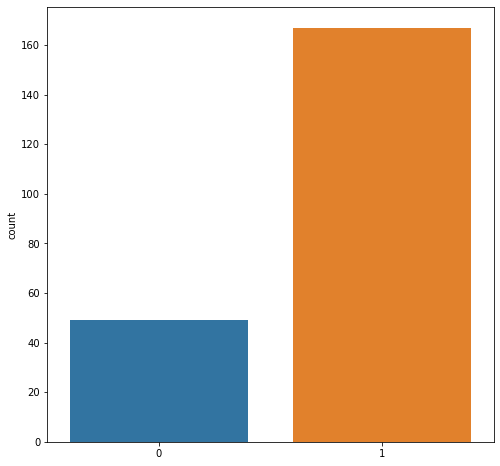

In [11]:
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
ax = sns.countplot(x=y_train, data=df) 
print(df['5yOS'].value_counts())

1    20
0    20
Name: 5yOS, dtype: int64


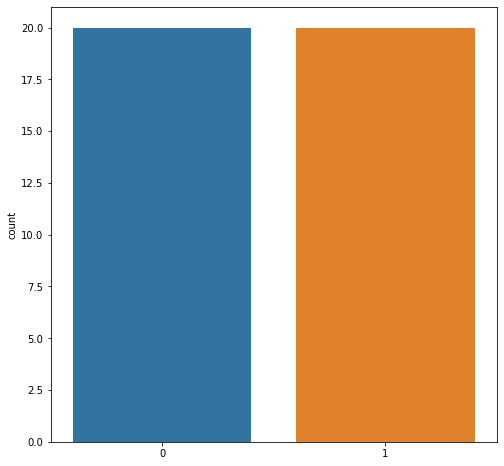

In [12]:
import seaborn as sns
ax = sns.countplot(x=y_test, data=df1)
print(df1['5yOS'].value_counts())

## Data preprocessing

### Clinical features

In [13]:
from imblearn.over_sampling import SVMSMOTE
from imblearn.pipeline import make_pipeline
sm = SVMSMOTE(random_state=11)
X00_train, y00_train = sm.fit_sample(X0_train, y_train)

Using TensorFlow backend.


In [14]:
unique, count = np.unique(y00_train, return_counts=True)
y00_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y00_train_smote_value_count

{0: 167, 1: 167}

In [15]:
print(y00_train.shape)
print(X00_train.shape)

(334,)
(334, 53)


In [16]:
new_df = pd.DataFrame(X00_train)
new_df1 = pd.DataFrame(y00_train)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-0.494049,-0.844567,-0.107366,0.292279,-0.555959,0.085170,2.116809,-0.104189,3.130495,0.137361,...,0.821230,1.475287,-2.236068,-0.858529,0.101443,1.429074,-1.183216,-0.887207,-0.147630,-1.004749
1,-0.494049,-0.939334,-1.556802,0.292279,-0.555959,-1.228878,-0.820434,-1.604515,-0.319438,0.137361,...,0.821230,-0.677834,0.447214,-0.858529,1.088458,1.429074,-1.183216,-1.215375,-0.725528,-0.726254
2,-0.494049,-1.034102,-1.556802,0.292279,-0.555959,0.085170,0.158647,-0.104189,-0.319438,0.137361,...,-1.217686,-0.677834,-2.236068,0.535774,-2.119340,1.429074,0.845154,0.609237,0.111683,0.273630
3,1.411569,-0.465499,-0.107366,0.292279,-0.555959,0.085170,0.158647,-0.104189,-0.319438,0.137361,...,-1.217686,-0.677834,-2.236068,1.930077,-0.145310,-0.699754,-1.183216,1.029291,2.919672,-1.440711
4,-0.494049,0.482171,-0.107366,0.292279,-0.555959,0.085170,-0.820434,-0.104189,-0.319438,0.137361,...,0.821230,1.475287,0.447214,-0.858529,-1.255702,-0.699754,0.845154,1.462473,-0.058723,1.440273


### Radiomics features

In [17]:
from imblearn.over_sampling import SVMSMOTE
from imblearn.pipeline import make_pipeline
sm = SVMSMOTE(random_state=11)
X11_train, y11_train = sm.fit_sample(X1_train, y_train)

In [18]:
unique, count = np.unique(y00_train, return_counts=True)
y11_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y11_train_smote_value_count

{0: 167, 1: 167}

In [19]:
print(y11_train.shape)
print(X11_train.shape)

(293,)
(293, 103)


In [20]:
new_df = pd.DataFrame(X11_train)
new_df1 = pd.DataFrame(y11_train)
new_df.head()

,0,1,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,101,102
0,-1.222421,-0.117765,-0.092874,-0.858051,-0.200148,-0.200148,-0.707070,-0.877932,0.613259,-0.722772,...,-0.300328,-0.368693,1.178243,-0.556440,-0.420327,0.383987,-0.507463,-0.337945,-0.295428,-0.864959
1,1.086709,0.395885,0.387048,1.405804,0.505533,0.505533,0.810063,1.533908,-0.798433,0.796868,...,-0.251555,-0.231894,-0.132923,-0.148622,-0.182064,-0.625282,0.317188,0.097098,-0.647933,0.888002
2,-0.540648,0.402458,0.379665,0.500262,0.423465,0.423465,0.705597,0.159634,-0.813396,0.733064,...,-0.245577,-0.297341,1.117109,-0.082973,-0.374735,0.100251,-1.218667,0.542499,-0.376790,-0.101558
3,-0.723292,0.327315,0.202463,0.160684,0.401423,0.401423,0.539401,-0.071584,-0.694707,0.565419,...,-0.322427,-0.451162,-1.072575,1.320428,-0.573923,-0.036173,-0.123798,-1.053366,-0.752860,-1.120537
4,1.160844,0.192471,-0.092874,1.518997,0.131550,0.131550,0.410005,1.291586,-0.636366,0.451454,...,-0.094512,0.026366,-0.325894,-0.226033,0.097011,-0.294324,0.832041,-0.547108,-0.164128,-0.080848


## Feature Selection

Accuracy: 100.00 % 


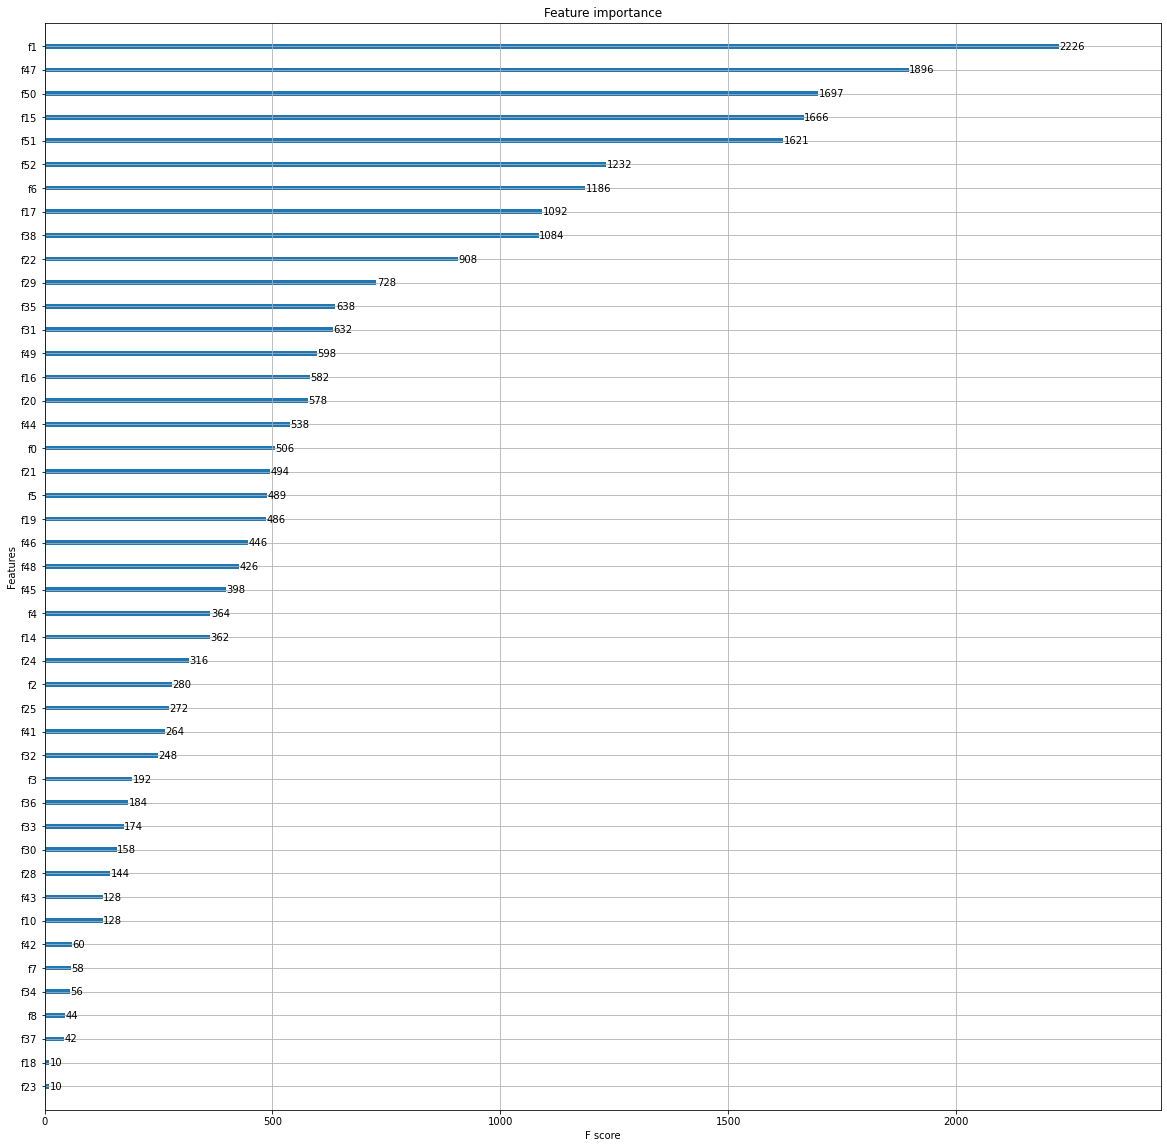

In [21]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
# set XGBoost's parameters
params = {
    'booster': 'gbtree',
    #'objective': 'binary:hinge',  #'binary:logistic', 
    'objective':'multi:softmax',
    'eval_metric':'auc',
    'num_class': 2, 
    #'gamma': 0.1,
    'max_depth': 10,
    #'alpha':1,
    'lambda': 1,
    #'subsample': 1,
    #'colsample_bytree': 1,
    #'min_child_weight': 3,
    #'scale_pos_weight':4,
    #'silent': 1,
    'eta': 0.01,
    'seed': 100,
    #'nthread': 4,    
}

plst = params.items()
# trian
dtrain = xgb.DMatrix(X00_train, y00_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# test
dtest = xgb.DMatrix(X00_train)
ans = model.predict(dtest)

# calculate
cnt1 = 0
cnt2 = 0
for i in range(len(y00_train)):
    if ans[i] == y00_train[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# show the importance, for feature selection
xgb.plot_importance(model, importance_type='weight')
#plt.savefig('fig2-new.jpg',dpi=1200)
plt.show()

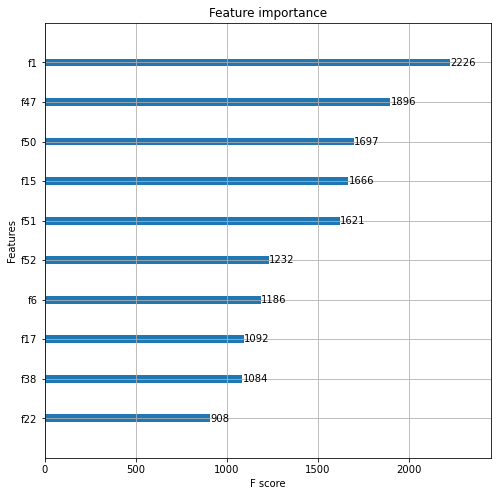

In [22]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
xgb.plot_importance(model,max_num_features=10, importance_type='weight') #or gain, cover.
plt.savefig('5OS-1.jpg',dpi=1200)

In [23]:
feat_labels0[[1,47,50,15,51,52,6,17,38,22]]

Index(['cli02', 'cli48', 'cli51', 'cli16', 'cli52', 'cli53', 'cli07', 'cli18',
       'cli39', 'cli23'],
      dtype='object')

Accuracy: 100.00 % 


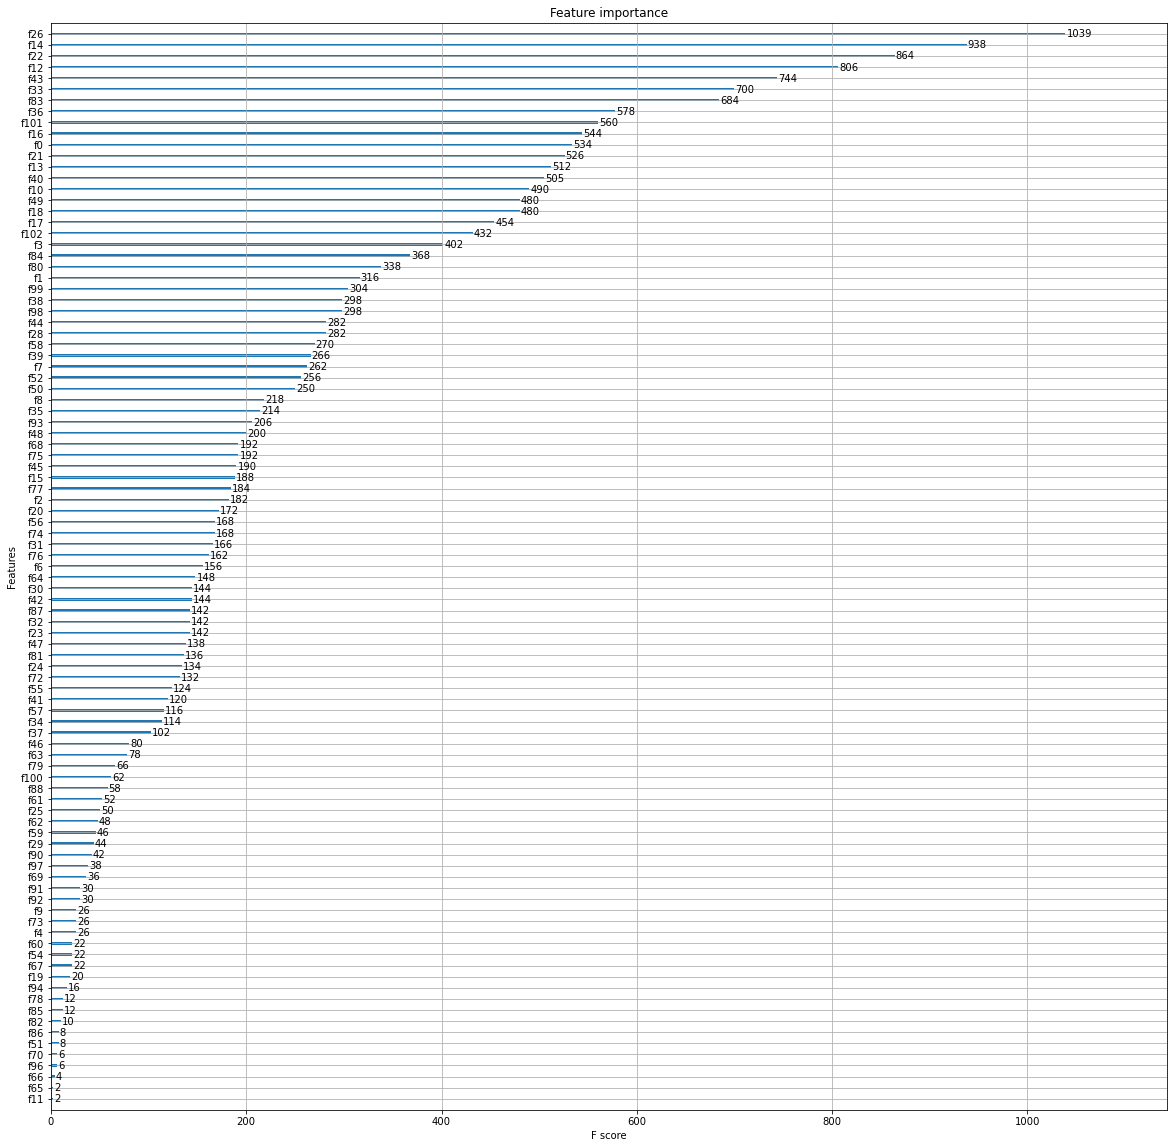

In [24]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 20.0)
# set XGBoost's parameters
params = {
    'booster': 'gbtree',
    #'objective': 'binary:hinge',  #'binary:logistic', 
    'objective':'multi:softmax',
    'eval_metric':'auc',
    'num_class': 2, 
    #'gamma': 0.1,
    'max_depth': 10,
    #'alpha':1,
    'lambda': 1,
    #'subsample': 1,
    #'colsample_bytree': 1,
    #'min_child_weight': 3,
    #'scale_pos_weight':4,
    #'silent': 1,
    'eta': 0.01,
    'seed': 100,
    #'nthread': 4,    
}

plst = params.items()
# trian
dtrain = xgb.DMatrix(X11_train, y11_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

# test
dtest = xgb.DMatrix(X11_train)
ans = model.predict(dtest)

# calculate
cnt1 = 0
cnt2 = 0
for i in range(len(y11_train)):
    if ans[i] == y11_train[i]:
        cnt1 += 1
    else:
        cnt2 += 1

print("Accuracy: %.2f %% " % (100 * cnt1 / (cnt1 + cnt2)))

# show the importance, for feature selection
xgb.plot_importance(model, importance_type='weight')
#plt.savefig('fig2-new.jpg',dpi=1200)
plt.show()

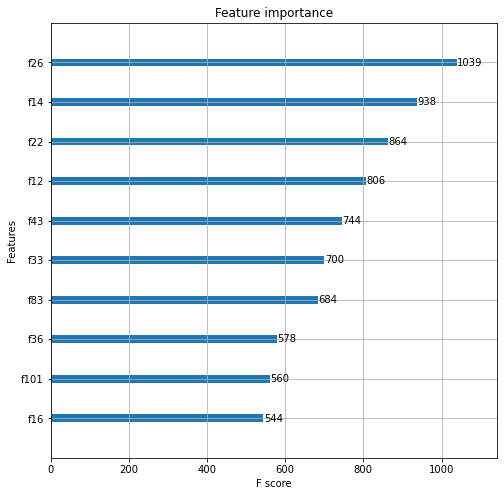

In [25]:
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
xgb.plot_importance(model,max_num_features=10, importance_type='weight') #or gain, cover.
plt.savefig('5OS-2.jpg',dpi=1200)

In [26]:
feat_labels1[[26,14,22,12,43,33,83,36,101,16]]

Index(['original_firstorder_Skewness', 'original_firstorder_Energy',
       'original_firstorder_Minimum', 'original_firstorder_10Percentile',
       'original_glcm_Imc2', 'original_glcm_ClusterShade',
       'original_glszm_ZoneVariance', 'original_glcm_Correlation',
       'original_ngtdm_Contrast', 'original_firstorder_InterquartileRange'],
      dtype='object')

In [27]:
X0 = X00_train[:,[1,47,50,15,51,52,6,17,38,22]]
X1 = X11_train[:,[26,14,22,12,43,33,83,36,101,16]]
X2 = X0_test[:,[1,47,50,15,51,52,6,17,38,22]]
X3 = X1_test[:,[26,14,22,12,43,33,83,36,101,16]]
y0 = y00_train
y1 = y11_train
y2 = y_test
y3 = y_test

print("the training clinical data:")
print(X0.shape)
print(y0.shape)
print("the training radiomics data:")
print(X1.shape) #
print(y1.shape)
print("the test clinical data:")
print(X2.shape) #
print(y2.shape)
print("the test radiomics data:")
print(X3.shape) #
print(y3.shape)

the training clinical data:
(334, 10)
(334,)
the training radiomics data:
(293, 10)
(293,)
the test clinical data:
(40, 10)
(40,)
the test radiomics data:
(40, 10)
(40,)


## Select modeling method

In [28]:
clf1 = LogisticRegression(penalty='l2',C=1, multi_class='auto',solver='liblinear',random_state=1)
clf2 = tree.DecisionTreeClassifier(random_state=1)
clf3 = ensemble.RandomForestClassifier(random_state=1)
clf4 = XGBClassifier(random_state=1)
clf5 = svm.SVC(probability=True, random_state=1)

### Clinical signature

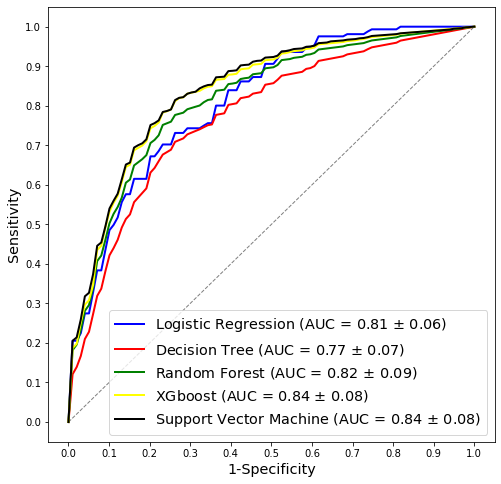

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import model_selection
from scipy import interp
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import auc, f1_score, roc_auc_score, roc_curve
from pylab import rcParams

cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

for train, test in cv.split(X0, y0):
    probas_ = clf1.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'Logistic Regression (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#############################################################
for train, test in cv.split(X0, y0):
    probas_ = clf2.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='red',label=r'Decision Tree (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
################################################################

for train, test in cv.split(X0, y0):
    probas_ = clf3.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='green',label=r'Random Forest (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X0, y0):
    probas_ = clf4.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='yellow',linestyle='-',label=r'XGboost (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X0, y0):
    probas_ = clf5.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='black',linestyle='-', label=r'Support Vector Machine (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

#################################################################
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

plt.savefig('5OS-3.jpg',dpi=1200)
plt.show()

### Radiomics signature

In [30]:
clf1 = LogisticRegression(penalty='l2',C=1, multi_class='auto',solver='liblinear',random_state=1)
clf2 = tree.DecisionTreeClassifier(random_state=1)
clf3 = ensemble.RandomForestClassifier(random_state=1)
clf4 = XGBClassifier(random_state=1)
clf5 = svm.SVC(probability=True, random_state=1)

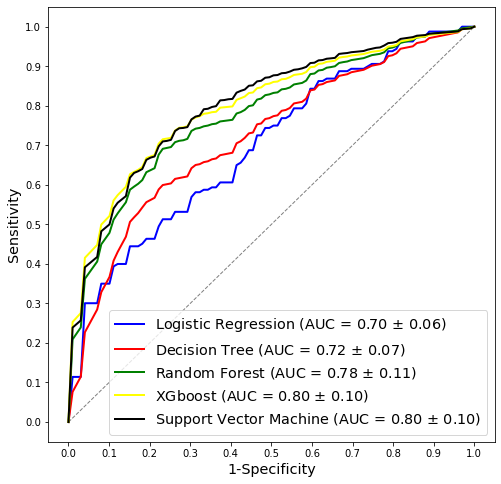

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import model_selection
from scipy import interp
import matplotlib
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import auc, f1_score, roc_auc_score, roc_curve
from pylab import rcParams

cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)

for train, test in cv.split(X1, y1):
    probas_ = clf1.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'Logistic Regression (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#############################################################
for train, test in cv.split(X1, y1):
    probas_ = clf2.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='red',label=r'Decision Tree (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
################################################################

for train, test in cv.split(X1, y1):
    probas_ = clf3.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='green',label=r'Random Forest (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X1, y1):
    probas_ = clf4.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='yellow',linestyle='-',label=r'XGboost (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#################################################################
for train, test in cv.split(X1, y1):
    probas_ = clf5.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    #plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
#matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=.6)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='black',linestyle='-', label=r'Support Vector Machine (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

#################################################################
#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'x-large')
plt.ylabel('Sensitivity', fontsize = 'x-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'x-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

plt.savefig('5OS-4.jpg',dpi=1200)
plt.show()

## Modeling & Validation

### Clinical Score

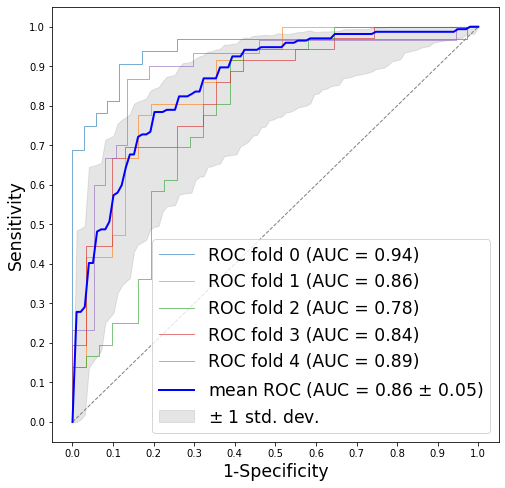

In [32]:
model = svm.SVC(probability=True, random_state=1)

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

for train, test in cv.split(X0, y0):
    probas_ = model.fit(X0[train], y0[train]).predict_proba(X0[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y0[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.xlabel('1-Specificity', fontsize = 'xx-large')
plt.ylabel('Sensitivity', fontsize = 'xx-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'xx-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

#plt.savefig('2OS-5.jpg',dpi=1200)
plt.show()

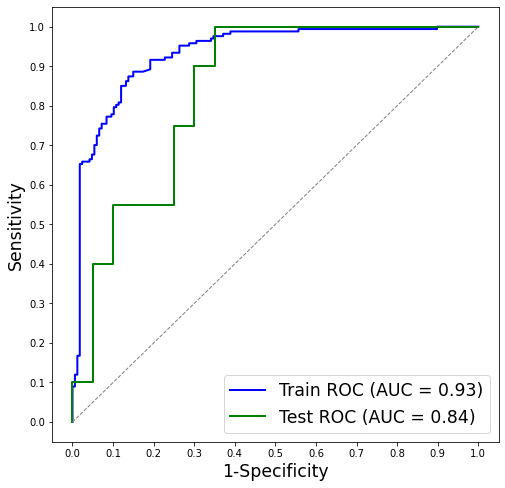

In [33]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
probas_ = model.predict_proba(X0)
fpr, tpr, thresholds = roc_curve(y0, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='blue', alpha=1, lw=2, linestyle='-',label='Train ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

probas_ = model.predict_proba(X2)
fpr, tpr, thresholds = roc_curve(y2, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='Test ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'xx-large')
plt.ylabel('Sensitivity', fontsize = 'xx-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'xx-large'
          )
plt.savefig('5OS-5.jpg',dpi=1200)
plt.show()

In [34]:
Y0_Pred = model.predict(X0)
pd.crosstab(pd.Series(Y0_Pred, name = 'Predicted'), 
            pd.Series(df['5yOS'], name = 'Actual'))

Actual,0,1
Predicted,,
0,33,14
1,16,153


In [35]:
Y2_Pred = model.predict(X2)
pd.crosstab(pd.Series(Y2_Pred, name = 'Predicted'), 
            pd.Series(df1['5yOS'], name = 'Actual'))

Actual,0,1
Predicted,,
0,12,0
1,8,20


In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

print("Accuracy = " , accuracy_score(y0, Y0_Pred))
print("Precision = " ,precision_score(y0, Y0_Pred))
print("Recall = " ,recall_score(y0, Y0_Pred))
print("F1 Score = " ,f1_score(y0, Y0_Pred))

Accuracy =  0.8532934131736527
Precision =  0.8138297872340425
Recall =  0.9161676646706587
F1 Score =  0.8619718309859155


In [37]:
print("Accuracy = " , accuracy_score(y2, Y2_Pred))
print("Precision = " ,precision_score(y2, Y2_Pred))
print("Recall = " ,recall_score(y2, Y2_Pred))
print("F1 Score = " ,f1_score(y2, Y2_Pred))

Accuracy =  0.8
Precision =  0.7142857142857143
Recall =  1.0
F1 Score =  0.8333333333333333


In [38]:
predictions = model.predict_proba(X0)
predictions

array([[0.72177208, 0.27822792],
       [0.36569003, 0.63430997],
       [0.15632445, 0.84367555],
       [0.19579313, 0.80420687],
       [0.2123072 , 0.7876928 ],
       [0.36510157, 0.63489843],
       [0.16211483, 0.83788517],
       [0.69005695, 0.30994305],
       [0.17670351, 0.82329649],
       [0.21103438, 0.78896562],
       [0.86533856, 0.13466144],
       [0.9260698 , 0.0739302 ],
       [0.19576057, 0.80423943],
       [0.15411182, 0.84588818],
       [0.19567106, 0.80432894],
       [0.19571477, 0.80428523],
       [0.5       , 0.5       ],
       [0.19569564, 0.80430436],
       [0.28932801, 0.71067199],
       [0.87197077, 0.12802923],
       [0.39795144, 0.60204856],
       [0.14487003, 0.85512997],
       [0.15579964, 0.84420036],
       [0.74410039, 0.25589961],
       [0.15863153, 0.84136847],
       [0.42487921, 0.57512079],
       [0.17684316, 0.82315684],
       [0.13455152, 0.86544848],
       [0.19563465, 0.80436535],
       [0.19569943, 0.80430057],
       [0.

In [39]:
predictions1 = model.predict_proba(X2)
predictions1

array([[0.52943838, 0.47056162],
       [0.36406814, 0.63593186],
       [0.05296875, 0.94703125],
       [0.13797852, 0.86202148],
       [0.16298852, 0.83701148],
       [0.31564457, 0.68435543],
       [0.25325091, 0.74674909],
       [0.24267156, 0.75732844],
       [0.35978875, 0.64021125],
       [0.32946143, 0.67053857],
       [0.15336901, 0.84663099],
       [0.3426733 , 0.6573267 ],
       [0.23999418, 0.76000582],
       [0.2448733 , 0.7551267 ],
       [0.25366076, 0.74633924],
       [0.51222052, 0.48777948],
       [0.27837763, 0.72162237],
       [0.37310645, 0.62689355],
       [0.31703666, 0.68296334],
       [0.11208874, 0.88791126],
       [0.42636262, 0.57363738],
       [0.29707744, 0.70292256],
       [0.93011252, 0.06988748],
       [0.86998336, 0.13001664],
       [0.79520265, 0.20479735],
       [0.12242222, 0.87757778],
       [0.35463423, 0.64536577],
       [0.28760316, 0.71239684],
       [0.25199073, 0.74800927],
       [0.77756198, 0.22243802],
       [0.

In [40]:
# save the data
pre_df = pd.DataFrame(predictions)
writer = pd.ExcelWriter('5OS-CS.xlsx')
pre_df.to_excel(writer,'page_1',float_format='%.5f')
writer.save() 

In [41]:
pre_df = pd.DataFrame(predictions1)
writer = pd.ExcelWriter('5OS-RS.xlsx')
pre_df.to_excel(writer,'page_1',float_format='%.5f')
writer.save() 

### Radiomic Score

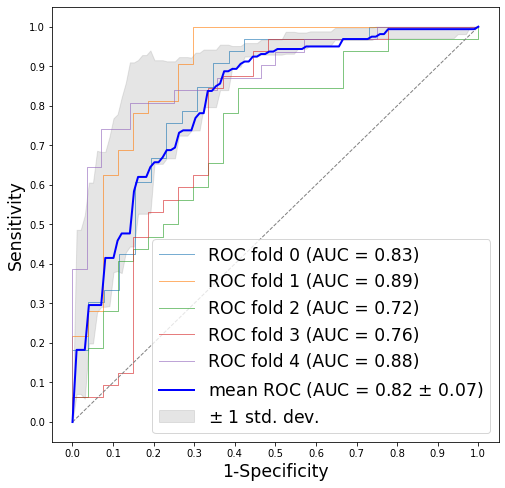

In [42]:
model = svm.SVC(probability=True, random_state=1)

matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 1)
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))

for train, test in cv.split(X1, y1):
    probas_ = model.fit(X1[train], y1[train]).predict_proba(X1[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    #optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=tpr, FPR=fpr, threshold=thresholds) ###
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.6,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
#optimal_th, optimal_point = Find_Optimal_Cutoff(TPR=mean_tpr, mean_fpr, threshold=thresholds)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',label=r'mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)

plt.xlabel('1-Specificity', fontsize = 'xx-large')
plt.ylabel('Sensitivity', fontsize = 'xx-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'xx-large'
          )
#plt.plot(optimal_point[0], optimal_point[1], marker='o', color='r')
#plt.text(optimal_point[0], optimal_point[1], f'Threshold:{optimal_th:.2f}')

#plt.savefig('2OS-5.jpg',dpi=1200)
plt.show()

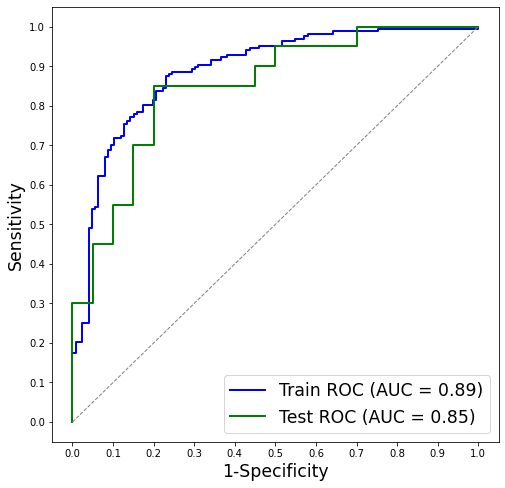

In [43]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)
i = 0
plt.xticks(np.arange(0, 1.1, step=0.1))
plt.yticks(np.arange(0, 1.1, step=0.1))
probas_ = model.predict_proba(X1)
fpr, tpr, thresholds = roc_curve(y1, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='blue', alpha=1, lw=2, linestyle='-',label='Train ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
#plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

probas_ = model.predict_proba(X3)
fpr, tpr, thresholds = roc_curve(y3, probas_[:, 1])
fpr=fpr
tpr=tpr
roc_auc = auc(fpr, tpr)
aucs.append(roc_auc)
#plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
plt.plot(fpr, tpr, color='green', alpha=1, lw=2, linestyle='-',label='Test ROC (AUC = %0.2f)' % roc_auc) 
#plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--',alpha=.6)
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='gray', alpha=1)

#plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
#plt.xlim([-0, 1])
#plt.ylim([-0, 1])
plt.xlabel('1-Specificity', fontsize = 'xx-large')
plt.ylabel('Sensitivity', fontsize = 'xx-large')
#plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right" ,
           fontsize = 'xx-large'
          )
plt.savefig('5OS-6.jpg',dpi=1200)
plt.show()

In [44]:
Y1_Pred = model.predict(X1)
pd.crosstab(pd.Series(Y1_Pred, name = 'Predicted'), 
            pd.Series(df['5yOS'], name = 'Actual'))

Actual,0,1
Predicted,,
0,24,12
1,25,155


In [45]:
Y3_Pred = model.predict(X3)
pd.crosstab(pd.Series(Y3_Pred, name = 'Predicted'), 
            pd.Series(df1['5yOS'], name = 'Actual'))

Actual,0,1
Predicted,,
0,11,3
1,9,17


In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

print("Accuracy = " , accuracy_score(y1, Y1_Pred))
print("Precision = " ,precision_score(y1, Y1_Pred))
print("Recall = " ,recall_score(y1, Y1_Pred))
print("F1 Score = " ,f1_score(y1, Y1_Pred))

Accuracy =  0.7815699658703071
Precision =  0.748792270531401
Recall =  0.9281437125748503
F1 Score =  0.8288770053475935


In [47]:
print("Accuracy = " , accuracy_score(y3, Y3_Pred))
print("Precision = " ,precision_score(y3, Y3_Pred))
print("Recall = " ,recall_score(y3, Y3_Pred))
print("F1 Score = " ,f1_score(y3, Y3_Pred))

Accuracy =  0.7
Precision =  0.6538461538461539
Recall =  0.85
F1 Score =  0.7391304347826088


In [48]:
predictions = model.predict_proba(X1)
predictions

array([[0.33362554, 0.66637446],
       [0.57422793, 0.42577207],
       [0.50633502, 0.49366498],
       [0.26024629, 0.73975371],
       [0.30930525, 0.69069475],
       [0.22018702, 0.77981298],
       [0.19534056, 0.80465944],
       [0.51211267, 0.48788733],
       [0.17581689, 0.82418311],
       [0.40488498, 0.59511502],
       [0.31259523, 0.68740477],
       [0.68839216, 0.31160784],
       [0.11930426, 0.88069574],
       [0.30452227, 0.69547773],
       [0.22670784, 0.77329216],
       [0.42714368, 0.57285632],
       [0.30243076, 0.69756924],
       [0.19494489, 0.80505511],
       [0.23810275, 0.76189725],
       [0.51793504, 0.48206496],
       [0.16307984, 0.83692016],
       [0.37367085, 0.62632915],
       [0.22650176, 0.77349824],
       [0.28857682, 0.71142318],
       [0.62941701, 0.37058299],
       [0.24793093, 0.75206907],
       [0.16951936, 0.83048064],
       [0.31335178, 0.68664822],
       [0.12646368, 0.87353632],
       [0.243866  , 0.756134  ],
       [0.

In [49]:
predictions1 = model.predict_proba(X3)
predictions1

array([[0.17597742, 0.82402258],
       [0.23996579, 0.76003421],
       [0.16153629, 0.83846371],
       [0.23813075, 0.76186925],
       [0.56928767, 0.43071233],
       [0.21794776, 0.78205224],
       [0.32290102, 0.67709898],
       [0.23144764, 0.76855236],
       [0.33141366, 0.66858634],
       [0.34322662, 0.65677338],
       [0.53608158, 0.46391842],
       [0.30436267, 0.69563733],
       [0.2107307 , 0.7892693 ],
       [0.43567881, 0.56432119],
       [0.42625509, 0.57374491],
       [0.71614797, 0.28385203],
       [0.29810376, 0.70189624],
       [0.21837371, 0.78162629],
       [0.14486262, 0.85513738],
       [0.39027284, 0.60972716],
       [0.56084275, 0.43915725],
       [0.46649089, 0.53350911],
       [0.80567063, 0.19432937],
       [0.75479648, 0.24520352],
       [0.78479731, 0.21520269],
       [0.2294079 , 0.7705921 ],
       [0.258577  , 0.741423  ],
       [0.51008808, 0.48991192],
       [0.60354608, 0.39645392],
       [0.64900172, 0.35099828],
       [0.

In [50]:
# save the data
pre_df = pd.DataFrame(predictions)
writer = pd.ExcelWriter('5OS-RTra.xlsx')
pre_df.to_excel(writer,'page_1',float_format='%.5f')
writer.save() 

In [51]:
pre_df = pd.DataFrame(predictions1)
writer = pd.ExcelWriter('5OS-RTest.xlsx')
pre_df.to_excel(writer,'page_1',float_format='%.5f')
writer.save() 